In [31]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
%matplotlib inline

df_train = pd.read_csv('diabetes-dataset.csv')
dropped_column = df_train['Outcome']
df_train.drop('Outcome', axis=1, inplace=True)
df_train.replace(to_replace=0, value=np.NaN, inplace=True)
df_train.dropna(inplace=True)
#readded Outcome / 0s here are useful
df_train['Outcome'] = dropped_column

df_train


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,1.0,139.0,62.0,41.0,480.0,40.7,0.536,21,0
8,2.0,83.0,65.0,28.0,66.0,36.8,0.629,24,0
11,4.0,125.0,70.0,18.0,122.0,28.9,1.144,45,1
15,2.0,81.0,72.0,15.0,76.0,30.1,0.547,25,0
16,7.0,195.0,70.0,33.0,145.0,25.1,0.163,55,1
...,...,...,...,...,...,...,...,...,...
1992,6.0,134.0,70.0,23.0,130.0,35.4,0.542,29,1
1994,1.0,79.0,60.0,42.0,48.0,43.5,0.678,23,0
1995,2.0,75.0,64.0,24.0,55.0,29.7,0.370,33,0
1996,8.0,179.0,72.0,42.0,130.0,32.7,0.719,36,1


In [93]:
df_train_split, df_temp = train_test_split(df_train, test_size=0.2, random_state = 0)
df_validation, df_test = train_test_split(df_temp, test_size=0.5, random_state = 0)
df_train_split

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
112,1.0,89.0,76.0,34.0,37.0,31.2,0.192,23,0
392,1.0,131.0,64.0,14.0,415.0,23.7,0.389,21,0
1120,9.0,145.0,80.0,46.0,130.0,37.9,0.637,40,1
1875,7.0,150.0,66.0,42.0,342.0,34.7,0.718,42,0
1479,1.0,119.0,88.0,41.0,170.0,45.3,0.507,26,0
...,...,...,...,...,...,...,...,...,...
1916,6.0,144.0,72.0,27.0,228.0,33.9,0.255,40,0
441,2.0,83.0,66.0,23.0,50.0,32.2,0.497,22,0
1433,2.0,100.0,70.0,52.0,57.0,40.5,0.677,25,0
1266,3.0,83.0,58.0,31.0,18.0,34.3,0.336,25,0


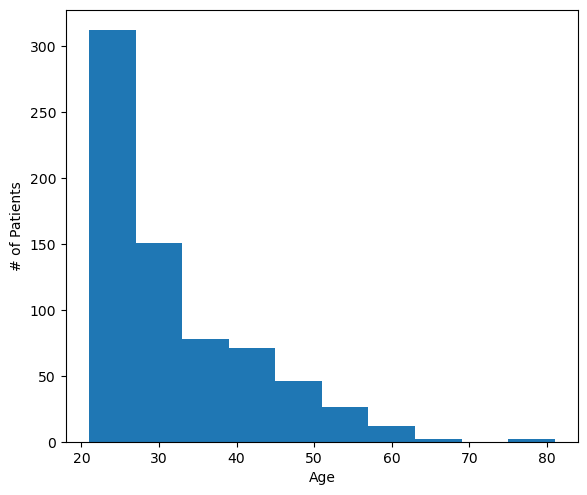

In [13]:
#hist for training data Age col
fig = plt.figure()
ax = fig.add_axes([.2,.3,.8,.9])
ax.hist(df_train_split['Age'])
ax.set_xlabel('Age')
ax.set_ylabel('# of Patients')
plt.show()

In [15]:
train_np = df_train_split.to_numpy()
train_std = train_np.std()
train_mean = train_np.mean()
train_z = (train_np - train_mean) / train_std
train_z


array([[-0.74260034,  0.61496199,  0.41441301, ..., -0.75506523,
        -0.40320975, -0.75802718],
       [-0.74260034,  1.26288947,  0.22929088, ..., -0.75202614,
        -0.43406344, -0.75802718],
       [-0.61918558,  1.47886529,  0.47612039, ..., -0.74820028,
        -0.14095339, -0.74260034],
       ...,
       [-0.72717349,  0.78465728,  0.32185194, ..., -0.74758321,
        -0.37235606, -0.75802718],
       [-0.71174665,  0.52240093,  0.13672981, ..., -0.75284376,
        -0.37235606, -0.75802718],
       [-0.6963198 ,  1.1703284 ,  0.32185194, ..., -0.74037887,
        -0.06381917, -0.74260034]])

In [19]:
columns = list(df_train.columns)
columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

/var/folders/83/q2pv_qz55cg9vngx_93_y_cmwwwpzm/T/ipykernel_43772/3131379861.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(columns)
/var/folders/83/q2pv_qz55cg9vngx_93_y_cmwwwpzm/T/ipykernel_43772/3131379861.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(columns)


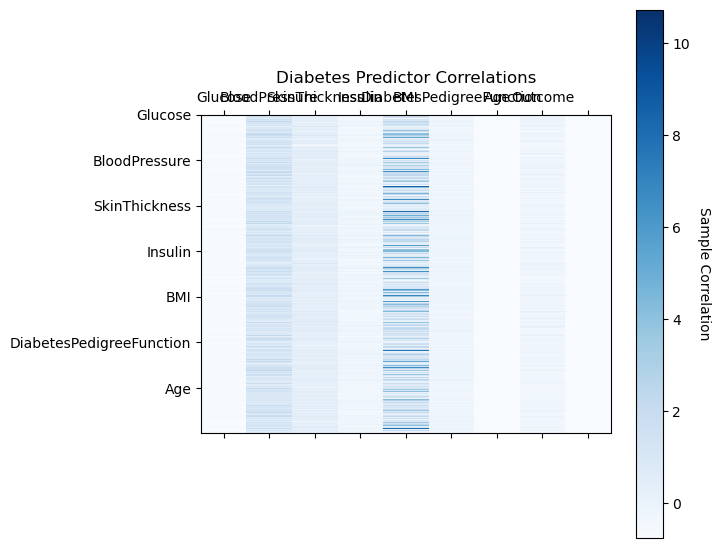

In [21]:
col = list(range(len(columns)))
fig = plt.figure()
ax = fig.add_axes([0.4,0.2,0.8,1.1])
mat = ax.matshow(train_z,cmap='Blues',aspect='.01')
cbar= fig.colorbar(mat)
cbar.ax.set_ylabel ('Sample Correlation', rotation=270,labelpad=15)
ax.set_xticklabels(columns)
ax.set_yticklabels(columns)
plt.title('Diabetes Predictor Correlations')
# ax.set_yticks(col)
# ax.set_xticks(col)
plt.show()

In [23]:
# (a) Performs PCA using all of the columns except the 'Outcome' column of the training data and 
# (b) determines the best number of components using a Scree Plot and the "elbow" method - 7 points
X_train = df_train_split[df_train_split.columns[:-1]].to_numpy()
X_train_mean = X_train.mean()
X_train_std = X_train.std()
X_train_Z = (X_train - X_train_mean)/X_train_std
Y_train = df_train_split[df_train_split.columns[-1]].to_numpy

pca = PCA()
pca.fit_transform(X_train_Z)

array([[-1.80595849e+00, -1.93672917e-01,  1.27847815e-01, ...,
        -5.13656842e-02, -1.52376789e-02, -4.16614566e-03],
       [ 3.90780043e+00, -6.00927974e-01, -2.56819056e-01, ...,
        -6.15675617e-02,  8.32049773e-04, -2.07145326e-03],
       [-2.69539247e-01,  4.39378302e-01,  2.31431951e-01, ...,
        -3.33997209e-02,  4.41588630e-02,  1.28753184e-03],
       ...,
       [-1.47266581e+00, -7.71586092e-02,  1.70330559e-01, ...,
        -3.18784779e-02, -9.93493627e-03,  1.90796530e-03],
       [-2.10649177e+00, -2.58769842e-01, -6.39338526e-02, ...,
         2.99788098e-02,  9.75302323e-03, -2.06834102e-03],
       [-4.52244080e-01,  1.40015784e-01,  3.72323927e-03, ...,
         3.12988756e-02, -3.93749239e-02,  9.56200922e-03]])

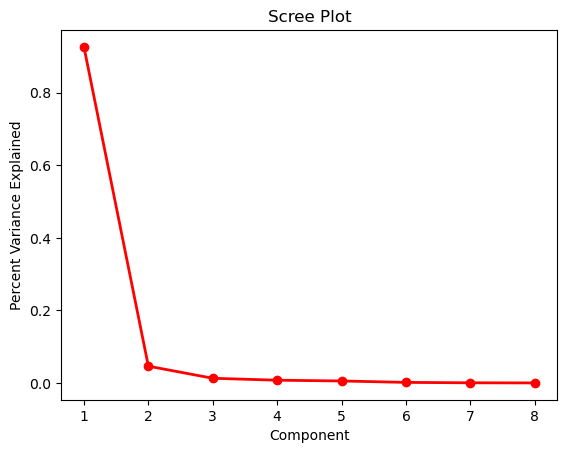

In [25]:
explained_variance_ratio = pca.explained_variance_ratio_
pc_values = np.arange(pca.n_components_) + 1 
plt.plot(pc_values, explained_variance_ratio, '-ro', linewidth = 2)
plt.title('Scree Plot')
plt.xlabel('Component')
plt.xticks(pc_values)
plt.ylabel('Percent Variance Explained')
plt.show()

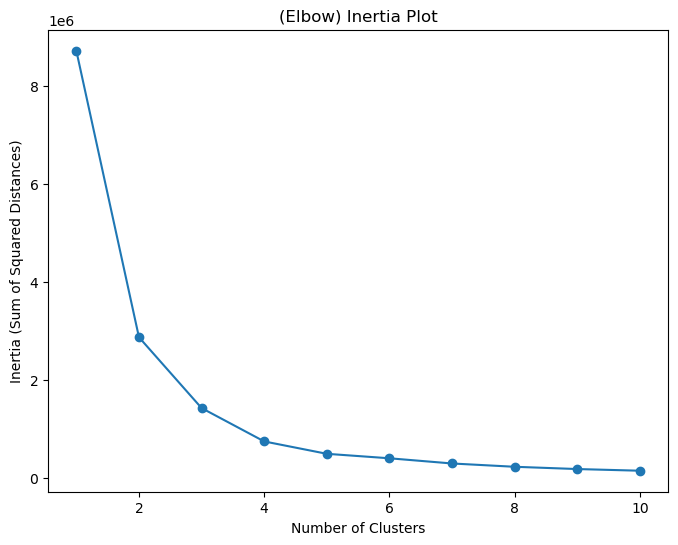

In [90]:
from sklearn.cluster import KMeans
pca = PCA(n_components=1)  
X_train_pca = pca.fit_transform(X_train) 
inertia = []  
for k in range(1, 11):  
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_train_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-')
plt.title('(Elbow) Inertia Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.show()

In [ ]:
#2 distinct prinicpal components using elbow method

In [119]:
columns = df_train_split[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'Age']].columns.tolist()
columns

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'Age']

In [39]:
# predict 'BMI' from z-scored 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', and 'Age'
# computes the Mean Squared Error (MSE) and correlation between the model's predictions and the actual 'BMI' values for the training data, validation data, and test data
# (c) plots the betas of for the trained Linear Regression model


In [95]:
x_train_linear = df_train_split[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'Age']].to_numpy()
y_train_linear = df_train_split[['BMI']].to_numpy()
x_train_mean = x_train_linear.mean(axis=0)
x_train_std = x_train_linear.std(axis=0)
x_train_linear_z = (x_train_linear - x_train_mean) / x_train_std
x_train_linear_z

array([[-8.77281129e-01, -1.08790521e+00,  4.89743646e-01,
         5.28954040e-01, -1.05299771e+00, -8.28947516e-01],
       [-8.77281129e-01,  2.78132765e-01, -4.93959517e-01,
        -1.43689586e+00,  2.38471521e+00, -1.02928008e+00],
       [ 1.70295749e+00,  7.33478756e-01,  8.17644701e-01,
         1.70846398e+00, -2.07211200e-01,  8.73879247e-01],
       ...,
       [-5.54751302e-01, -7.30133357e-01, -2.10793535e-03,
         2.29821895e+00, -8.71108140e-01, -6.28614955e-01],
       [-2.32221475e-01, -1.28305349e+00, -9.85811099e-01,
         2.34076556e-01, -1.22579281e+00, -6.28614955e-01],
       [ 9.03083515e-02,  8.29844836e-02, -2.10793535e-03,
        -1.04372588e+00, -2.79967029e-01,  1.37471065e+00]])

In [97]:
model = LinearRegression()
model.fit(x_train_linear_z, y_train_linear)
y_pred = model.predict(x_train_linear_z)

In [99]:
#MSE
np.square(y_pred-y_train_linear).mean()

22.913637917104726

In [101]:
np.corrcoef(y_pred, y_train_linear)

/Users/baffoebonnieja/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/baffoebonnieja/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Users/baffoebonnieja/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [103]:
model.coef_

array([[ 0.07807658, -0.05600425,  0.75085954,  3.67722047,  1.10865977,
        -0.33769225]])

In [ ]:
columns = df_train_split[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'Age']].columns.tolist()

/var/folders/83/q2pv_qz55cg9vngx_93_y_cmwwwpzm/T/ipykernel_43772/300144959.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(columns)


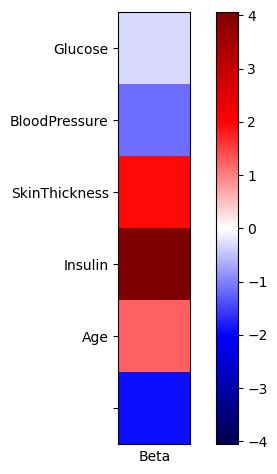

In [121]:
fig = plt.figure()
ax = fig.add_axes([.1,.2,.8,.9])
cmax = np.abs(model.coef_).max()
cax = ax.matshow(np.reshape(model.coef_,[-1,1]),cmap='seismic',aspect='1',vmax=cmax,vmin=-1.0*cmax)
fig.colorbar(cax)
#ax.set_yticks([0,1,2,3,4,5,6])
ax.set_yticklabels(columns)
ax.set_xticks([])
ax.set_xlabel('Beta')
plt.show()

In [131]:
#validation data regression
x_train_linear = df_validation[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'Age']].to_numpy()
y_train_linear = df_validation[['BMI']].to_numpy()
x_train_mean = x_train_linear.mean(axis=0)
x_train_std = x_train_linear.std(axis=0)
x_train_linear_z = (x_train_linear - x_train_mean) / x_train_std

model = LinearRegression()
model.fit(x_train_linear_z, y_train_linear)
y_pred = model.predict(x_train_linear_z)



In [133]:
np.square(y_pred-y_train_linear).mean()

20.466939929474634

In [113]:
model.coef_

array([[-0.29024697, -1.14952064,  1.95855311,  4.0563625 ,  1.25732995,
        -1.90418573]])

In [123]:
columns2 = df_validation[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'Age']].columns.tolist()
columns2

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'Age']

/var/folders/83/q2pv_qz55cg9vngx_93_y_cmwwwpzm/T/ipykernel_43772/2651058035.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(columns2)


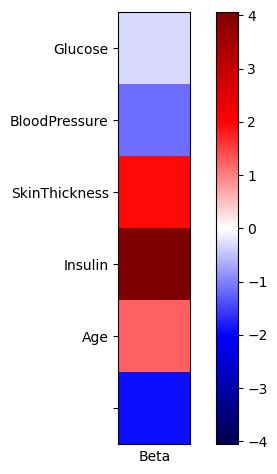

In [125]:
fig = plt.figure()
ax = fig.add_axes([.1,.2,.8,.9])
cmax = np.abs(model.coef_).max()
cax = ax.matshow(np.reshape(model.coef_,[-1,1]),cmap='seismic',aspect='1',vmax=cmax,vmin=-1.0*cmax)
fig.colorbar(cax)
#ax.set_yticks([0,1,2,3,4,5,6])
ax.set_yticklabels(columns2)
ax.set_xticks([])
ax.set_xlabel('Beta')
plt.show()

In [135]:
x_train_linear = df_test[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'Age']].to_numpy()
y_train_linear = df_test[['BMI']].to_numpy()
x_train_mean = x_train_linear.mean(axis=0)
x_train_std = x_train_linear.std(axis=0)
x_train_linear_z = (x_train_linear - x_train_mean) / x_train_std

model = LinearRegression()
model.fit(x_train_linear_z, y_train_linear)
y_pred = model.predict(x_train_linear_z)
np.square(y_pred-y_train_linear).mean()

22.354462421596878

In [137]:
model.coef_

array([[ 0.06903291, -0.33316195,  1.76575945,  3.98561478,  1.01367978,
        -1.36269905]])

In [139]:
columns3 = df_validation[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'Age']].columns.tolist()
columns3

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'Age']

/var/folders/83/q2pv_qz55cg9vngx_93_y_cmwwwpzm/T/ipykernel_43772/4286547051.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(columns3)


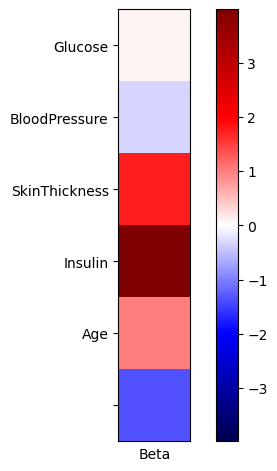

In [141]:
fig = plt.figure()
ax = fig.add_axes([.1,.2,.8,.9])
cmax = np.abs(model.coef_).max()
cax = ax.matshow(np.reshape(model.coef_,[-1,1]),cmap='seismic',aspect='1',vmax=cmax,vmin=-1.0*cmax)
fig.colorbar(cax)
#ax.set_yticks([0,1,2,3,4,5,6])
ax.set_yticklabels(columns3)
ax.set_xticks([])
ax.set_xlabel('Beta')
plt.show()

In [145]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

X_train = df_train_split.drop(columns=['Outcome']).to_numpy()
y_train = df_train_split['Outcome'].to_numpy()

X_val = df_validation.drop(columns=['Outcome']).to_numpy()
y_val = df_validation['Outcome'].to_numpy()

# X_test = df_test_split.drop(columns=['Outcome']).to_numpy()
# y_test = df_test_split['Outcome'].to_numpy()

scaler = StandardScaler()
X_train_z = scaler.fit_transform(X_train)
X_val_z = scaler.transform(X_val)
